## Load Data from CSVs

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv(filename):
    with open(filename, 'rb') as f:
       reader = unicodecsv.DictReader(f)
       return list(reader)
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')
enrollments = read_csv('enrollments.csv')
print (enrollments[0])
print (daily_engagement[0])
print (project_submissions[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [3]:
test = []
f = open('dashatest1.csv', 'rb') 
bla = unicodecsv.DictReader(f)
for i in bla:
    test.append(i)
f.close()
print(test)

[OrderedDict([('var1', '1'), ('var2', '2'), ('var3', '3'), ('var4', '4'), ('var5', '5')]), OrderedDict([('var1', '45'), ('var2', '6'), ('var3', '7'), ('var4', '8'), ('var5', '9')]), OrderedDict([('var1', '34'), ('var2', '5'), ('var3', '6'), ('var4', '7'), ('var5', '8')]), OrderedDict([('var1', '456'), ('var2', '8565'), ('var3', '343534'), ('var4', '7'), ('var5', '8')])]


In [4]:
testlist = []
with open('dashatest1.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    for i in reader:
        testlist.append(i)
print(testlist)
        

[OrderedDict([('var1', '1'), ('var2', '2'), ('var3', '3'), ('var4', '4'), ('var5', '5')]), OrderedDict([('var1', '45'), ('var2', '6'), ('var3', '7'), ('var4', '8'), ('var5', '9')]), OrderedDict([('var1', '34'), ('var2', '5'), ('var3', '6'), ('var4', '7'), ('var5', '8')]), OrderedDict([('var1', '456'), ('var2', '8565'), ('var3', '343534'), ('var4', '7'), ('var5', '8')])]


In [5]:

with open('dashatest1.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    testlist = list(reader)
print(testlist)
        

[OrderedDict([('var1', '1'), ('var2', '2'), ('var3', '3'), ('var4', '4'), ('var5', '5')]), OrderedDict([('var1', '45'), ('var2', '6'), ('var3', '7'), ('var4', '8'), ('var5', '9')]), OrderedDict([('var1', '34'), ('var2', '5'), ('var3', '6'), ('var4', '7'), ('var5', '8')]), OrderedDict([('var1', '456'), ('var2', '8565'), ('var3', '343534'), ('var4', '7'), ('var5', '8')])]


In [6]:
def makedict(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        testlist = list(reader)
        return testlist
new = makedict('dashatest1.csv')
print(new)

[OrderedDict([('var1', '1'), ('var2', '2'), ('var3', '3'), ('var4', '4'), ('var5', '5')]), OrderedDict([('var1', '45'), ('var2', '6'), ('var3', '7'), ('var4', '8'), ('var5', '9')]), OrderedDict([('var1', '34'), ('var2', '5'), ('var3', '6'), ('var4', '7'), ('var5', '8')]), OrderedDict([('var1', '456'), ('var2', '8565'), ('var3', '343534'), ('var4', '7'), ('var5', '8')])]


In [7]:
def makedict(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
new = makedict('dashatest1.csv')
print(new)

[OrderedDict([('var1', '1'), ('var2', '2'), ('var3', '3'), ('var4', '4'), ('var5', '5')]), OrderedDict([('var1', '45'), ('var2', '6'), ('var3', '7'), ('var4', '8'), ('var5', '9')]), OrderedDict([('var1', '34'), ('var2', '5'), ('var3', '6'), ('var4', '7'), ('var5', '8')]), OrderedDict([('var1', '456'), ('var2', '8565'), ('var3', '343534'), ('var4', '7'), ('var5', '8')])]


In [8]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.


## Fixing Data Types

In [9]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [10]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [11]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Investigating the Data

In [12]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

print(len(daily_engagement))
print(len(enrollments))
print(len(project_submissions))

136240
1640
3642


In [13]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for i in daily_engagement:
    i['account_key'] = i['acct']
for i in daily_engagement:
    del(i['acct'])



In [14]:
def get_unique_students(var):
    unique_students = set()
    for i in var:
        unique_students.add(i['account_key'])
    return unique_students
get_unique_students(daily_engagement)
print(len(get_unique_students(daily_engagement)))
print(len(get_unique_students(enrollments)))
1302-1237  

1237
1302


65

## Problems in the Data

In [15]:
print(daily_engagement[10000])

OrderedDict([('utc_date', datetime.datetime(2015, 2, 9, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '60')])


## Missing Engagement Records

In [16]:
#####################################
#                 4                 #
#####################################
for i in enrollments:
    if i['account_key'] not in get_unique_students(daily_engagement):
        print(i)
        break
        

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


## Checking for More Problem Records

In [17]:
#####################################
#                 5                 #
#####################################

        
## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
count = 0
for i in enrollments:
    if i['account_key'] not in get_unique_students(daily_engagement)\
    and i['join_date'] != i['cancel_date']:
        count += 1
        print(i)
print(count)

       


OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
3


In [18]:
count = 0
for i in enrollments:
    if i['is_udacity'] == True:
        count +=1
print(count)

18


In [19]:
udacity_test_accounts = set()
for i in enrollments:
    if i['is_udacity'] == True:
        udacity_test_accounts.add(i['account_key'])


In [27]:
def remove_udacity_accounts(var):
    non_udacity_data = []
    for i in var:
        if i['account_key'] in udacity_test_accounts:
            del(i)
        else:
            non_udacity_data.append(i)
    return non_udacity_data

In [28]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

In [29]:
print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Tracking Down the Remaining Problems

In [ ]:
# Create a set of the account keys for all Udacity test accounts
#see above

In [ ]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
#see above

In [30]:
# Remove Udacity test accounts from all three tables
#see above
print(enrollments[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', True), ('is_canceled', True)])


## Refining the Question

In [31]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for i in non_udacity_enrollments:
    if i['days_to_cancel'] == None:
        x = i['account_key']
        y = i['join_date']
        if x not in paid_students or y > paid_students[x]:
            paid_students.update({i['account_key']:i['join_date']})
            
    elif i['days_to_cancel'] > 7:
        x = i['account_key']
        y = i['join_date']
        if x not in paid_students or y > paid_students[x]:
            paid_students.update({i['account_key']:i['join_date']})            
print(len(paid_students))

995


In [32]:
print(paid_students['0'])

2015-01-09 00:00:00


## Getting Data from First Week

In [33]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [34]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
for i in non_udacity_engagement:
    if i['account_key'] in paid_students:
        if within_one_week(paid_students[i['account_key']], i['utc_date']) == True:
            paid_engagement_in_first_week.append(i)
print(len(paid_engagement_in_first_week))
            

6919


In [39]:
print(type(paid_engagement_in_first_week))

<class 'list'>


## Exploring Student Engagement

In [35]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

    

In [38]:
print(engagement_by_account['0'])

[OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 37.2848873333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 53.6337463333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 33.4892696667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 13, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 64.7796776667), ('lessons_completed'

In [ ]:
for key, value in engagement_by_account.items():
    break

In [103]:
keyf

'0'

In [105]:
value

[OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 11.6793745),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 37.2848873333),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 53.6337463333),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 12, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 33.4892

In [62]:
print(total_minutes_by_account['3'])

2530.6469816678004


In [64]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes


In [86]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())
print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [82]:
student_with_max_minutes = None
max_minutes = 0
for i, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = i
        
max_minutes
print(student_with_max_minutes)

163


In [81]:
for i in paid_engagement_in_first_week:
    if i['account_key'] == student_with_max_minutes:
        print(i)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 471.2139785), ('lessons_completed

In [106]:

total_lessons_by_account = {}
for i, record in engagement_by_account.items():
    total_lessons = 0
    for item in record:
        total_lessons += item['lessons_completed']
    total_lessons_by_account[i] = total_lessons

In [111]:
total_lessons = list(total_lessons_by_account.values())
print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [ ]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

## Lessons Completed in First Week

In [113]:
#####################################
#                 9                 #
#####################################
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def group_data(file,key_name): 
    grouped_data = defaultdict(list)
    for record in file:
        key = record[key_name]
        grouped_data[key].append(record)
    return grouped_data
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

In [117]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for i, record in grouped_data.items():
        total = 0
        for item in record:
            total += item[field_name]
        summed_data[i] = total
    return summed_data
total_lessons_by_account = sum_grouped_items(engagement_by_account,'lessons_completed')

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


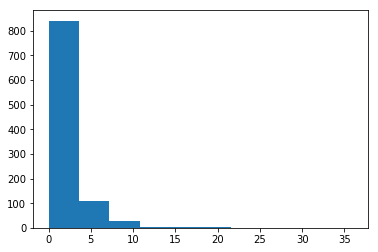

In [210]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def describe_data(data):
    print ('Mean:', np.mean(data))
    print ('Standard deviation:', np.std(data))
    print ('Minimum:', np.min(data))
    print ('Maximum:', np.max(data))
    plt.hist(data)
total_lessons = list(total_lessons_by_account.values())
describe_data(total_lessons)

In [260]:
np.std(total_lessons)

3.0025612998294231

## Number of Visits in First Week

In [ ]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

In [130]:
total_visits_by_account = {}
for i, all_records in engagement_by_account.items():
    count = 0
    for record in all_records:
        if record['num_courses_visited'] !=0:
            count +=1
        else:
            count = count
    total_visits_by_account[i] = count


In [131]:
total_visits = list(total_visits_by_account.values())
describe_data(total_visits)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


In [129]:
print(total_visits_by_account['0'])

7


In [139]:
print(non_udacity_submissions[1])

OrderedDict([('creation_date', datetime.datetime(2015, 1, 10, 0, 0)), ('completion_date', datetime.datetime(2015, 1, 13, 0, 0)), ('assigned_rating', 'INCOMPLETE'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


## Splitting out Passing Students

In [160]:
paid_submissions = []
for i in non_udacity_submissions:
    if i['account_key'] in paid_students:
        paid_submissions.append(i)
print(len(paid_submissions))
         

3618


In [166]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project = set()

for record in paid_submissions:
    if record['lesson_key'] in subway_project_lesson_keys \
    and (record['assigned_rating'] == 'PASSED' \
    or record['assigned_rating'] == 'DISTINCTION'):
        pass_subway_project.add(record['account_key'])




In [173]:
passing_engagement = []
non_passing_engagement = []
for item in paid_engagement_in_first_week:
                if item['account_key'] in pass_subway_project:
                    passing_engagement.append(item)
                else:
                    non_passing_engagement.append(item)
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


In [ ]:
see above

## Comparing the Two Student Groups

In [ ]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

In [175]:
pass_engagement_by_account = group_data(passing_engagement, 'account_key')
non_pass_engagement_by_account = group_data(non_passing_engagement, 'account_key')
## Adapt the code above to find the mean, standard deviation, minimum, and m

In [176]:
total_lessons_passed = sum_grouped_items(pass_engagement_by_account,'lessons_completed')
total_lessons_nonpassed = sum_grouped_items(non_pass_engagement_by_account,'lessons_completed')

In [187]:
total_minutes_passed = sum_grouped_items(pass_engagement_by_account,'total_minutes_visited')
total_minutes_nonpassed = sum_grouped_items(non_pass_engagement_by_account,'total_minutes_visited')

In [180]:
total_lessons_passed_values = list(total_lessons_passed.values())
describe_data(total_lessons_passed_values)

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


In [181]:
total_lessons_nonpassed_values = list(total_lessons_nonpassed.values())
describe_data(total_lessons_nonpassed_values)

Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


In [188]:
total_minutes_passed_values = list(total_minutes_passed.values())
describe_data(total_minutes_passed_values)

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


In [189]:
total_minutes_nonpassed_values = list(total_minutes_nonpassed.values())
describe_data(total_minutes_nonpassed_values)

Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


In [183]:
pass_visits_by_account = {}
for i, all_records in pass_engagement_by_account.items():
    count = 0
    for record in all_records:
        if record['num_courses_visited'] !=0:
            count +=1
        else:
            count = count
    pass_visits_by_account[i] = count
total_visits_passed_values = list(pass_visits_by_account.values())
describe_data(total_visits_passed_values)

Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


In [186]:
nonpass_visits_by_account = {}
for i, all_records in non_pass_engagement_by_account.items():
    count = 0
    for record in all_records:
        if record['num_courses_visited'] !=0:
            count +=1
        else:
            count = count
    nonpass_visits_by_account[i] = count
total_visits_nonpassed_values = list(nonpass_visits_by_account.values())
describe_data(total_visits_nonpassed_values)

Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


## Making Histograms

(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

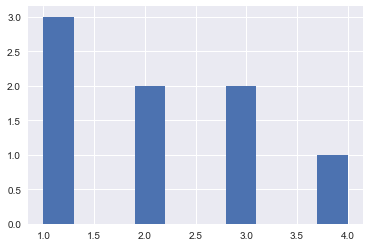

In [265]:
data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)


(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

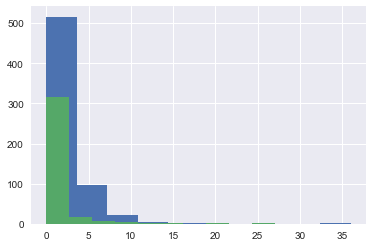

In [266]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
plt.hist(total_lessons_passed_values)
plt.hist(total_lessons_nonpassed_values)


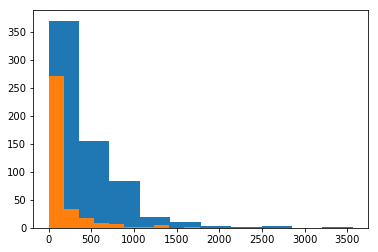

In [205]:
plt.hist(total_minutes_passed_values)
plt.hist(total_minutes_nonpassed_values)
plt.show()

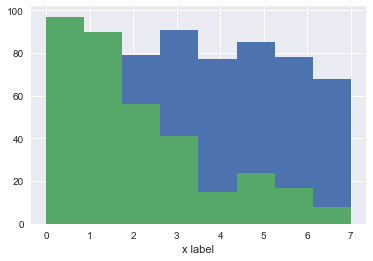

In [275]:
plt.hist(total_visits_passed_values, bins = 8)
plt.hist(total_visits_nonpassed_values, bins = 8)
plt.xlabel('x label')


In [261]:
import seaborn as sns


## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.


In [282]:
import pandas as pd
test = pd.read_csv('daily_engagement.csv')
print(len(test['acct'].unique()))
test2 = []
test2 = test['acct'].unique()
print(test2)

1237
[   0    1    2 ..., 1302 1303 1305]


In [285]:
np.mean(test2)

636.19725141471304